<a href="https://colab.research.google.com/github/majorquev/DBDC_202209_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase5/00_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

In [2]:
#install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)
library(nycflights13)


## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=..count..)`.

,x
,<dbl>
1,0.2588229
2,1.8311207
3,-0.3396186
4,0.8971982
5,0.4880163
6,-1.2553858


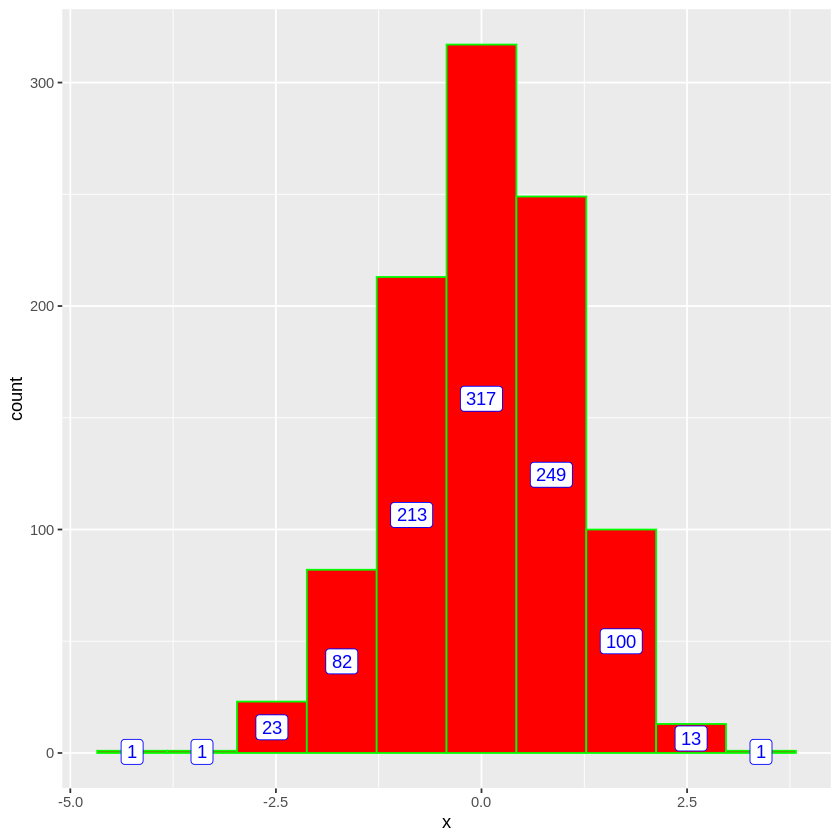

In [11]:
# Histograma de frecuencias relativas
set.seed(15)
data <- data.frame(x = rnorm(1000))

head(data)

data %>%
  ggplot() +
  aes(x = x) +
  geom_histogram(
    bins = 10,
    color = "green",#opcional
    fill = "red"#opcional
  ) +
  stat_bin(
    bins = 10,
    geom = "label",
    mapping = aes(label = ..count..),
    #OPCIONAL
    color = "blue",
    position = position_stack(vjust = 0.5)
  )






2.- Misma Visualización pero con histograma de frecuencias relativas.

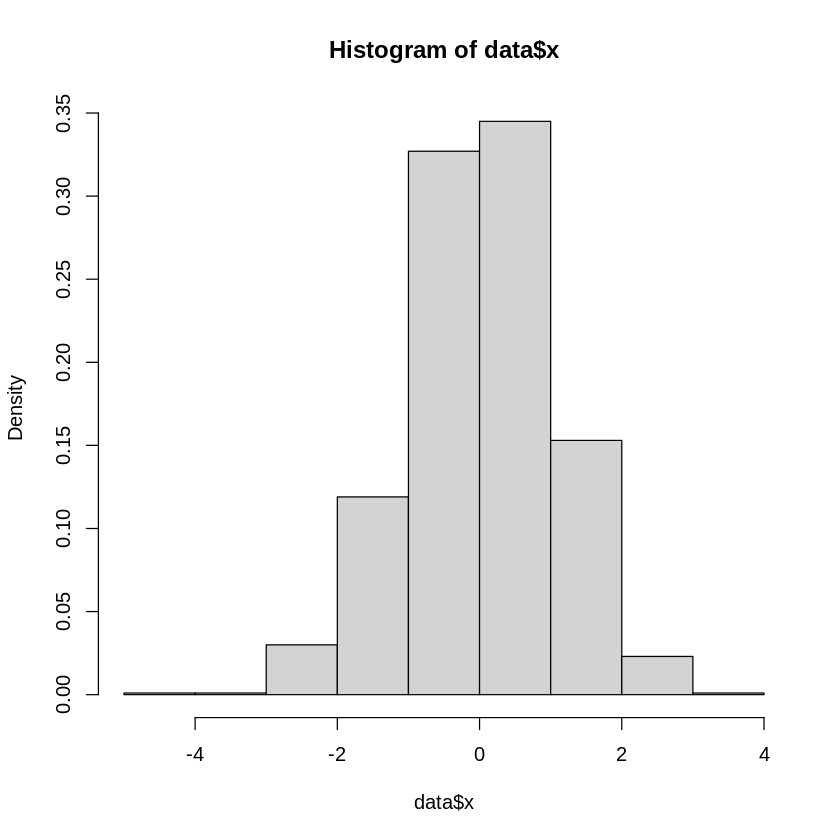

In [16]:
# Nota: Con R base
hist(data$x, breaks = 10, freq = F )

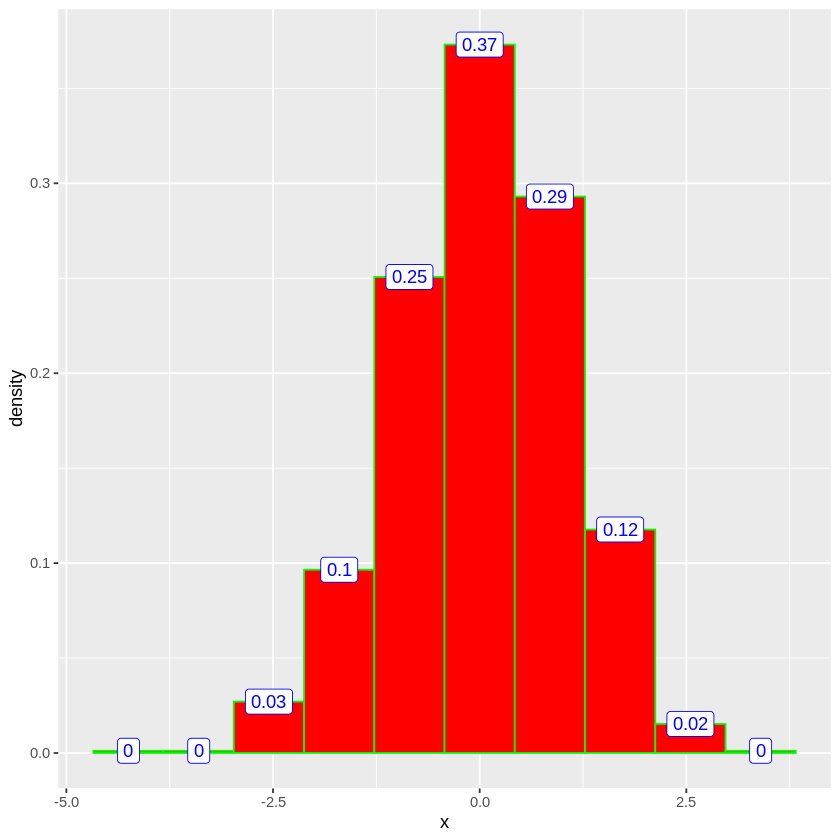

In [15]:
# Adicionalmente, si se quiere mostrar el histograma de frecuencia --------
#  es lo mismo pero se añade y = ..density.. en el maepo estético del histograma

data %>%
  ggplot() +
  aes(x = x, y = ..density..) +
  geom_histogram(
    bins = 10,
    color = "green",#opcional
    fill = "red"#opcional
  ) +
  stat_bin(
    bins = 10,
    geom = "label",
    mapping = aes(label = round(..density..,2) ),
    #OPCIONAL
    color = "blue",
    position = position_stack(vjust = 1)
  )


## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para o cual buscaremos visualizar la serie que contiene el total de vuelos por cada día, hasta el mes de julio. 
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

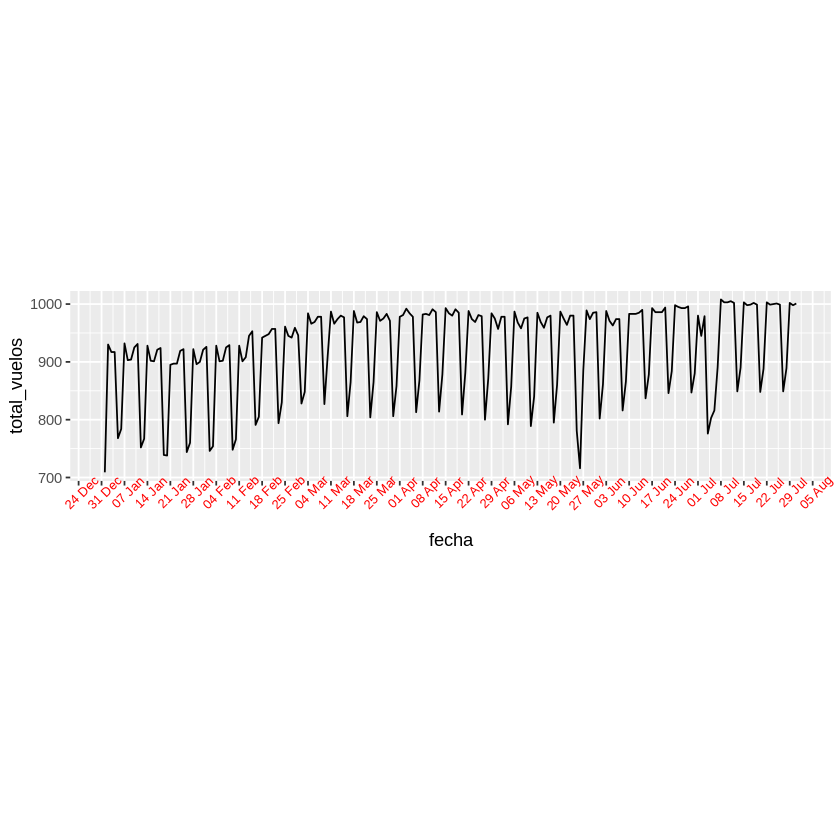

In [29]:

# Orientación etiquetas ejes ----------------------------------------------
data(flights)
#head(flights)
# A modo de ejemplo podemos visulizar el total de vuelos por día .
flights %>%
  mutate(fecha = as.Date(time_hour)) %>% 
  filter(fecha <= "2013-07-31") %>%
  group_by(fecha) %>%
  summarise(total_vuelos = n()) %>% 
  ggplot() +
  aes(x = fecha, total_vuelos) +
  geom_line() +
  scale_x_date(date_breaks = "1 week", date_labels = "%d %b") +
  theme(aspect.ratio = 0.25, axis.text.x = element_text(size = 8, angle = 45, color = "red") )
  

# La función element_text() permite modificar orientación, y ajste vertical y hoizontal


In [26]:
?theme

## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

Consideremos un gráfico de barras con las cantidades de vuelos para cada aeropuerto de destino. Para ello graficaremos los aeropuertos de *destino* de ranking 1, 10 y 20, según su total de vuelos.


In [ ]:
data(flights)

In [33]:
# conteo por origen destino -----------------------------------------------------
resumen_vuelos <- flights %>%
  count(dest) %>%
  rename(total_vuelos = n)

  head(resumen_vuelos)

dest,total_vuelos
<chr>,<int>
ABQ,254
ACK,265
ALB,439
ANC,8
ATL,17215
AUS,2439


In [41]:
# Generamos el ranking para cada aeropuerto
# Opción 1
resumen_vuelos <- resumen_vuelos %>%
                    arrange(desc(total_vuelos))



# Opción 2
resumen_vuelos <- resumen_vuelos %>%
  mutate(rk = row_number())

head(resumen_vuelos)

resumen_vuelos[c(1,10,20),]

resumen_vuelos %>% 
  filter(rk %in% c(1,10,20))


dest,total_vuelos,rk
<chr>,<int>,<int>
ORD,17283,1
ATL,17215,2
LAX,16174,3
BOS,15508,4
MCO,14082,5
CLT,14064,6


dest,total_vuelos,rk
<chr>,<int>,<int>
ORD,17283,1
DCA,9705,10
LAS,5997,20


dest,total_vuelos,rk
<chr>,<int>,<int>
ORD,17283,1
DCA,9705,10
LAS,5997,20


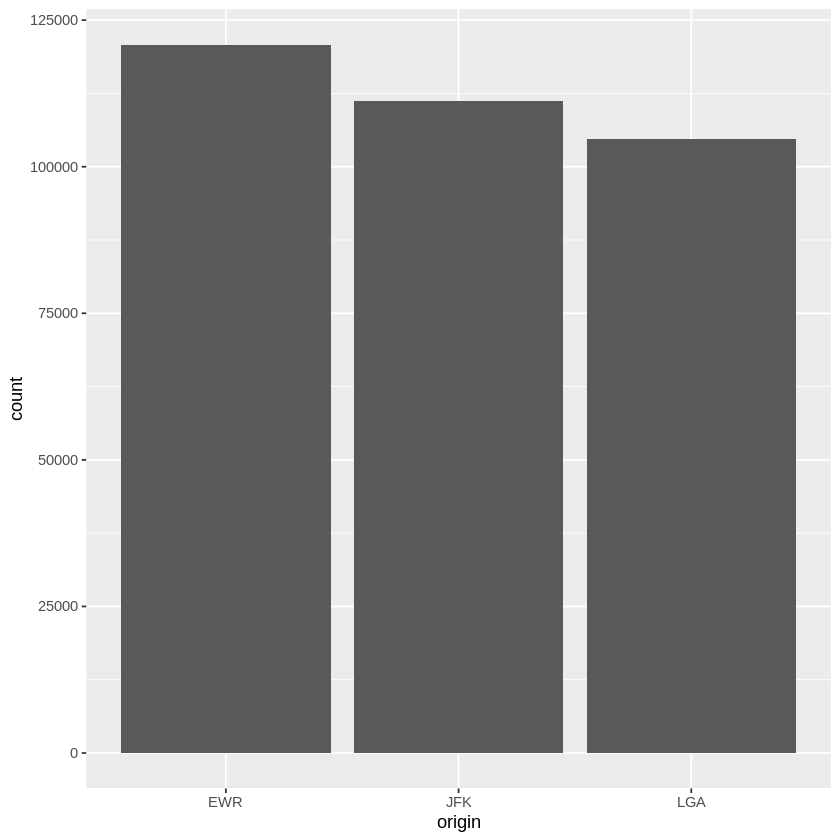

In [43]:
# Nota: geom_bar()
flights %>%
  ggplot() +
  aes(x = origin) +
  geom_bar() # R por defecto genera el conteo por cada categorìa


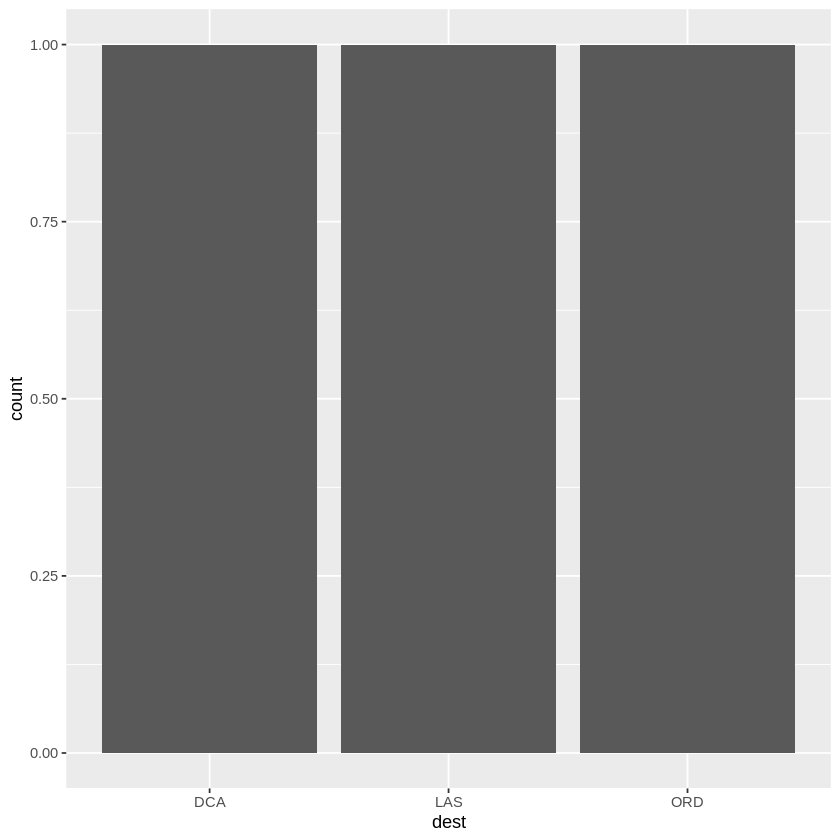

In [45]:

# Gráfico de barras  ---------------------------------

resumen_vuelos[c(1,10,20),] %>%
  ggplot() +
  aes(x = dest) +
  geom_bar()  # R por defecto genera el conteo por cada categorìa, y como hay 1 solo registro por dstino se ve así el gráfico.


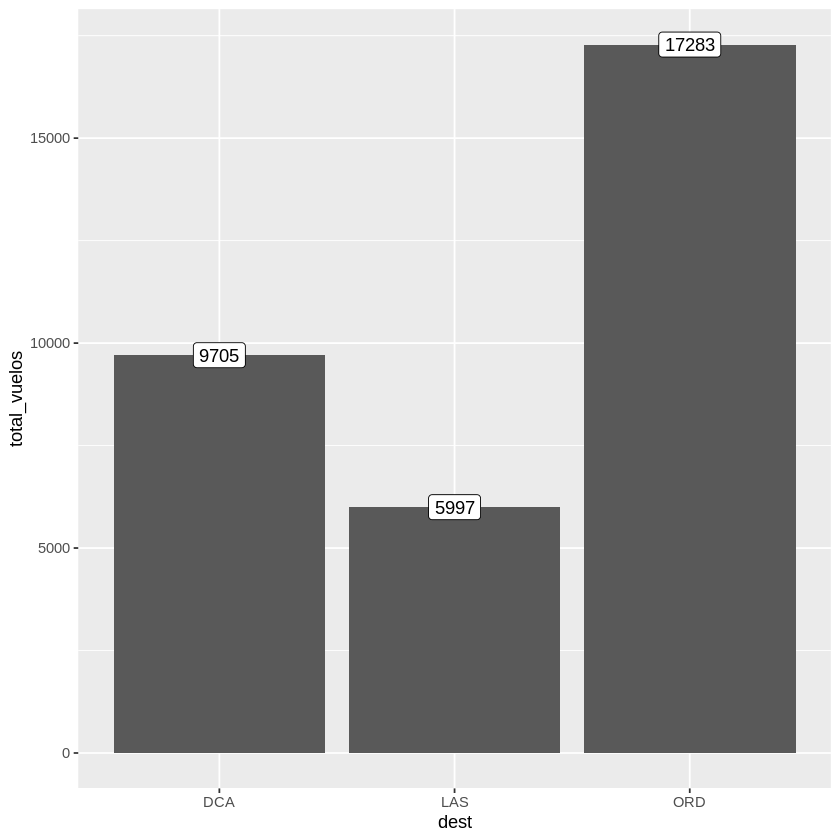

In [47]:
resumen_vuelos[c(1,10,20),] %>%
  ggplot() +
  aes(x = dest, y = total_vuelos) +
  geom_bar(stat = "identity") + # Esto le indica a geom_bar que tiene que poner como altura de la barra lo declarado en y.
  geom_label(aes(label = total_vuelos))

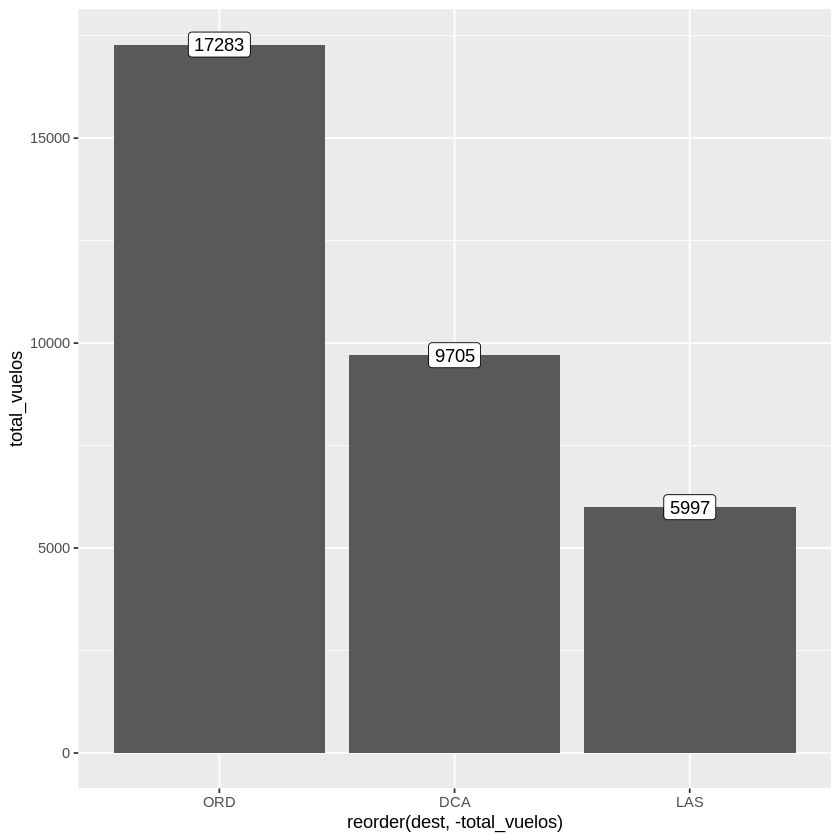

In [49]:
# Reordenar el eje x
resumen_vuelos[c(1,10,20),] %>%
  ggplot() +
  aes(x = reorder(dest, -total_vuelos), y = total_vuelos) +
  geom_bar(stat = "identity") + # Esto le indica a geom_bar que tiene que poner como altura de la barra lo declarado en y.
  geom_label(aes(label = total_vuelos))